# PyOperon PVT
Try to recover:
$V=\frac{10.732(T+459.68)}{p+14.7}$

using 2000 triples.

In [1]:
# Install libraries
!pip install -U pyoperon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstall

In [2]:
# Call libraries
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from pyoperon.sklearn import SymbolicRegressor
import time

In [3]:
# Build Toy Dataset
p=np.arange(start=100,stop=5100,step=100)
t=np.arange(start=60,stop=260,step=5)
pa=np.zeros((len(p)*len(t)))
ta=np.zeros((len(p)*len(t)))
va=np.zeros((len(p)*len(t)))
for i in range(len(p)):
    for j in range(len(t)):
        pa[i*len(t)+j]=p[i]
        ta[i*len(t)+j]=t[j]
        va[i*len(t)+j]=10.732*(t[j]+459.68)/(p[i]+14.7)

dfv=pd.DataFrame(data={'Pressure':pa,'Temperature':ta,'Volume':va})
x=np.stack((pa,ta),axis=1)

In [4]:
t0 = time.time()
myMod=SymbolicRegressor(random_state=7)
myMod.fit(x,va)
va_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

time to fit:  71.83265423774719 seconds


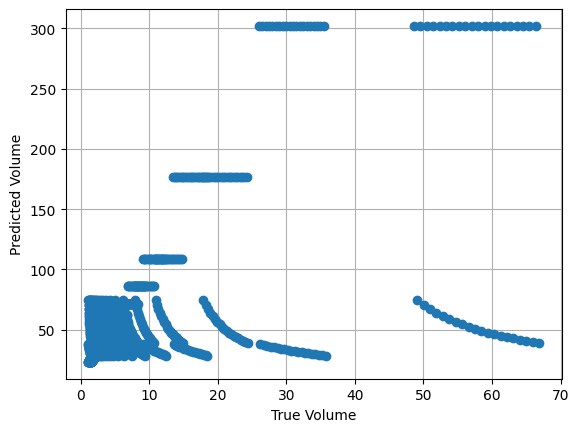

In [5]:
plt.plot(va,va_pred,marker="o",linestyle="None")
plt.xlabel('True Volume')
plt.ylabel('Predicted Volume')
plt.grid()
plt.show()

In [7]:
myRes = [(s['objective_values'], s['tree'], s['minimum_description_length']) for s in myMod.pareto_front_]
myEq=myMod.get_model_string(myRes[0][1], 12)
sym.simplify(myEq)

0.005700399633 + 43.641532897949*(0.0198531423709294*X2 - 1.45738196373 + (0.623904526234*X1 - 1.024268865585)/(0.058510996401*X1 + 0.163137257099))/(0.081459358335*X1 + 0.755534410477) - 25.9469642250501*(1.146539397537*X2 - 8.273242950439)/(X1*(1.093464158476*X1 - 0.0905470798710706*X2 + 1.310057282448))

In [ ]:
p, t = sym.symbols('p t')
myTarg=sym.sympify(10.732*(t+459.68)/(p+14.7))
myTarg